In [1]:
import cv2
import matplotlib.pyplot as plt

I have used a big sample of the dataset for faces and eyes from this websit: 
    https://github.com/opencv/opencv/tree/master/data/haarcascades

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [3]:
capturing_face = cv2.VideoCapture(1) # Read from the firs camera.

while True:
    __, img = capturing_face.read()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)

        for (x,y,w,h) in eyes:
        
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
       
    cv2.imshow('Face Detecition', img)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

capturing_face.release()
cv2.destroyAllWindows()

(<matplotlib.image.AxesImage at 0x1f65417ba90>,
 Text(0.5,1,'Detecation of the Face'))

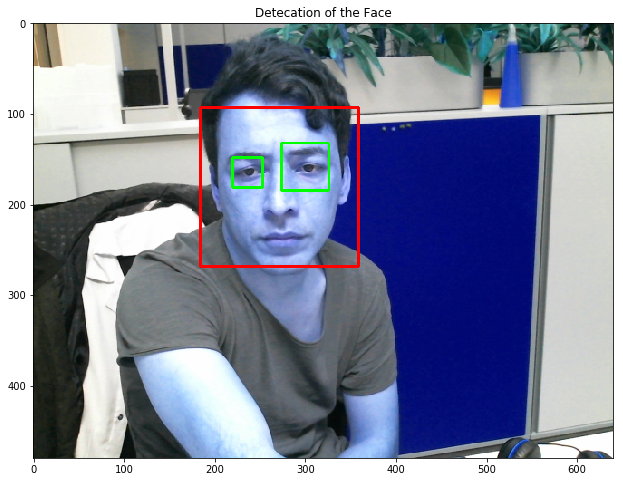

In [4]:
plt.figure(figsize=(12, 8))        
plt.imshow(img), plt.title('Detecation of the Face')